# Session 2: NEU350 Workflow

## Section 1: Package Management

As we talked about last time, python is a language of packages. Because base python is rather sparse, python users rely on a set of core packages (e.g. numpy, scipy, matplotlib) to accomplish most programming goals. The core packages are already installed with Anaconda. But what if we want to install a new package? Or update an existing package to a new verison?

Cut to **pip**. pip is a package manager for python. In other words, it's a tool that allows you to install and manage python libraries and dependencies that are not distributed as part of the standard library. Briefly, pip works by querying the [Pyton Package Index](https://pypi.org/), an online repostory of python packages and their versions. In the following section, we'll cover the basics of using pip (installing, updating, and uninstalling packages).

#### Step 1: Open a terminal

pip is a command line tool. That is, it's a tool that can be called and used from a Terminal session. There are many ways to open a Terminal (e.g. go to Applications --> Terminal, launch a new Terminal from jupyter-lab, or launch a Terminal from Anaconda Navigator).

#### Step 2: Make sure pip is installed

pip comes standard with Anaconda, meaning it should already be available on your machine. To make sure, enter the following command in the Terminal:

```bash
pip help
```

#### Step 3: Show list of installed packages

To see the list of packages already available, type enter the following command:

```bash
pip list
```

#### Step 4: Install a new package

In today's tutorial, we will be making use of two new packages, `neo` and `mne`. The command for installing these packages are:

```bash
pip install neo mne
```

In general, the syntax for installing a new package is:

```bash
pip install <package_name>
```

#### Step 5: Updating a package

In today's tutorial, we will be making use of another package, `seaborn`. The command for updating this packge is:

```bash
pip install --upgrade seaborn
```

In general, the syntax for updating a new package is:

```bash
pip install --upgrade <package_name>
```

#### Step 6: Uninstalling a package

Finally, uninstalling a package is straightforward:

```bash
pip uninstall <package_name>
```

#### Step 7 (Optional): Clearing space

Periodically, you may want to remove optional files from your installs (e.g. zip files). To do so, you can run:

```bash
conda clean --all
```

## Section 2: Reading _.abf_ Files

With `neo` installed, we can begin to read in and work with _.abf_ files. Today we will be working with an example file comprised of an extracellular recording (suction electrode) of a crayfish abdominal nerve and an intracellular recording of a muscle fiber. 

To load in a file, we import `neo` and point it to the sample file.

In [1]:
import neo
import numpy as np

## Define path to file.
f = 'sample.abf'

## Load file.
sample = neo.AxonIO(filename=f)
sample

AxonIO: sample.abf
nb_block: 1
nb_segment:  [1]
signal_channels: [Suction, ExtraCell]
unit_channels: []
event_channels: [Tag]

To extract the data from the file, we apply the `.read_block()` function.

In [2]:
## Extract block.
block = sample.read_block()
block

the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release


Block with 1 segments, 2 channel_indexes
annotations: {'abf_version': 2.6}
file_origin: 'sample.abf'
rec_datetime: datetime.datetime(2017, 9, 25, 16, 42, 58, 552999)
# segments (N=1)
0: Segment with 2 analogsignals, 1 events
   annotations: {'abf_version': 2.6}
   # analogsignals (N=2)
   0: AnalogSignal with 1 channels of length 3983360; units uV; datatype float32 
      name: 'Suction'
      annotations: {'channel_id': 0, 'nADCNum': 0}
      sampling rate: 50000.0 Hz
      time: 0.0 s to 79.6672 s
   1: AnalogSignal with 1 channels of length 3983360; units mV; datatype float32 
      name: 'ExtraCell'
      annotations: {'channel_id': 1, 'nADCNum': 1}
      sampling rate: 50000.0 Hz
      time: 0.0 s to 79.6672 s

From above, we can see there is only one segment in the data file. That is, only one recording episode was made for this file. We can extract the two recordings from the first segment, _suction_ and _extracell_, using the syntax below. 

In [3]:
## Extract segments.
segments = block.segments[0]

## Extract recordings.
nerve, muscle = segments.analogsignals

Let's examine the metadata associated with the _nerve_ recording.

In [4]:
nerve

AnalogSignal with 1 channels of length 3983360; units uV; datatype float32 
name: 'Suction'
annotations: {'channel_id': 0, 'nADCNum': 0}
sampling rate: 50000.0 Hz
time: 0.0 s to 79.6672 s

And now for the _muscle_ recording.

In [5]:
muscle

AnalogSignal with 1 channels of length 3983360; units mV; datatype float32 
name: 'ExtraCell'
annotations: {'channel_id': 1, 'nADCNum': 1}
sampling rate: 50000.0 Hz
time: 0.0 s to 79.6672 s

For our analysis below, we will want to record the sampling rate (or the number of datapoints collected in a second).

In [6]:
## Define times.
sfreq = float(nerve.sampling_rate)

For ease of analysis, we will convert the recordings to NumPy arrays.

In [7]:
## Convert to NumPy array.
nerve = nerve.as_array().squeeze()
muscle = muscle.as_array().squeeze()

We will define the timepoints of each sample collected. Remember that 1 over the sampling rate gives us the time elapsed per sample.

In [8]:
## Define times.
times = np.arange(nerve.size) / sfreq

Finally, for ease of analysis, we will restrict our data to the first 15s of each recording. Note the indexing procedure needs to be applied to both the nerve data and times array.

In [9]:
nerve = nerve[times <= 15]    # Limit the nerve recording to first 15s.
times = times[times <= 15]    # Limit the times to first 15s.

## Section 3: Introduction to Visualization 

Matplotlib, or the Matlab plotting library, is the core plotting package of the scientific python distribution. The origial goal of Matplotlib was to recreate all of the plotting capabilities of Matlab in python. 

We will go through the syntax of plotting the five most common types of plots: line plots, scatter plots, histograms, and bar plots. We will also cover adding details to plots (e.g. axes, titles, legends), making multiple plots in one figure, and scaling/sizing plots.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline 

## NOTE: The second line is a bit of notebook magic! 
## It's a jupyter-notebook shortcut that makes all
## plots be displayed at the bottom of a cell.

#### Matplotlib Terminology
In Matplotlib jargon, an _axis_ is a plot and a _figure_ is the canvas containing all plots. The most basic figure contains a single axis (i.e. one plot). More complex figures may have multiple plots of different sizes and numbers per row. 

This distinction is important because certain graphical tweaks can only be applied to figures or axes. For example, figures control the size of the canvas, the spacing of plots, and saving figures. Axes control plot-specific features, including labels, titles, and legends. To start, we will only generate figures with one plot. Later, we will introduce drawing multiple plots per figure.

#### Initializing Figures

There are many ways of initializing figures in Matplotlib. We will cover the three main functions. Note these involve slightly different syntaxes and allow for slightly different control.

The first function, `plt.subplot`, requires the user to define an *a priori* canvas layout and then initialize each axis separately.

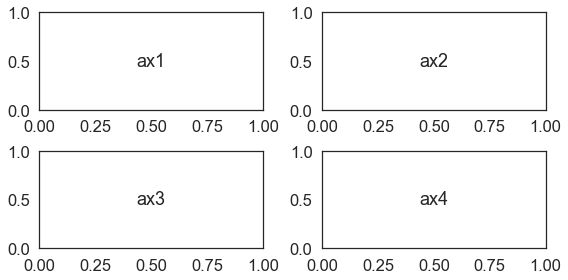

In [11]:
## Subplot example: Figure needs to be called.
fig = plt.figure(figsize=(8,4))

## Make 2x2 figure.
ax = plt.subplot(2,2,1)
ax.text(0.5,0.5,'ax1', fontsize=18, ha='center', va='center')

ax = plt.subplot(2,2,2)
ax.text(0.5,0.5,'ax2', fontsize=18, ha='center', va='center')

ax = plt.subplot(2,2,3)
ax.text(0.5,0.5,'ax3', fontsize=18, ha='center', va='center')

ax = plt.subplot(2,2,4)
ax.text(0.5,0.5,'ax4', fontsize=18, ha='center', va='center')

plt.tight_layout()

The second function, `plt.subplots`, requires the user to define an *a priori* canvas layout but initializes all (equal sized) axes at once. 

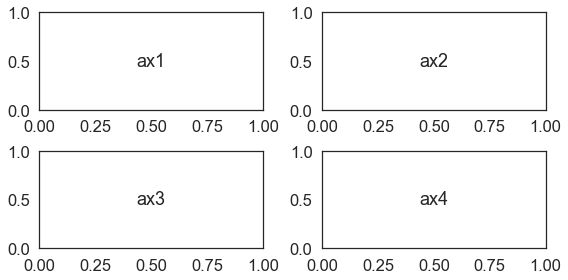

In [12]:
## Subplot example: Figure needs to be called.
fig, axes = plt.subplots(2,2,figsize=(8,4))

for i, ax in enumerate(axes.flatten()):
    ax.text(0.5,0.5,f'ax{i+1}',fontsize=18, ha='center', va='center')

plt.tight_layout()

With the third function, `plt.subplot2grid()`, the user defines geometry of the canvas and the location of the subplot in the grid. Importantly, this function allows for non-equal axis sizes. Here we present an example geometry for a 3x3 grid.

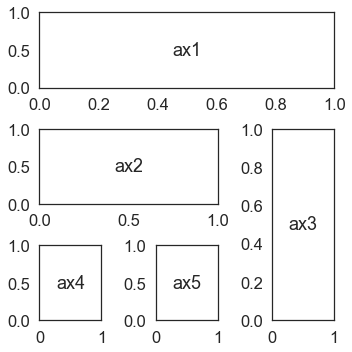

In [13]:
## subplot2grid example: Figure must be called.
fig = plt.figure(figsize=(5,5))

ax = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax.text(0.5,0.5,'ax1', fontsize=18, ha='center', va='center')

ax = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax.text(0.5,0.5,'ax2', fontsize=18, ha='center', va='center')

ax = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax.text(0.5,0.5,'ax3', fontsize=18, ha='center', va='center')

ax = plt.subplot2grid((3, 3), (2, 0))
ax.text(0.5,0.5,'ax4', fontsize=18, ha='center', va='center')

ax = plt.subplot2grid((3, 3), (2, 1))
ax.text(0.5,0.5,'ax5', fontsize=18, ha='center', va='center')

plt.tight_layout()

#### Lineplots
Lineplots are more intuitive than are barplots, requiring at the minimum only the x- and y-datapoints. Many tweaks and embellishments can similarly be added. 

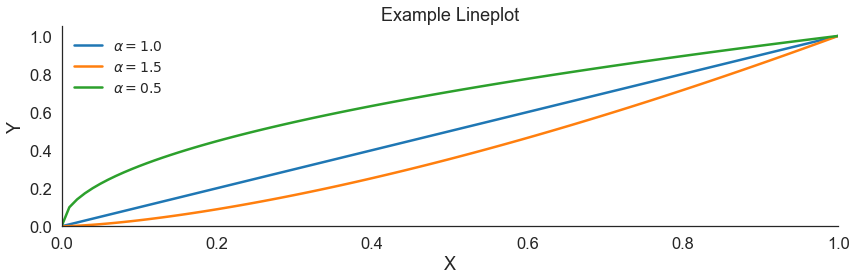

In [14]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Simulate data.
x = np.linspace(0,1,101)

## Plot lines.
for alpha in [1, 1.5, 0.5]:
    ax.plot(x, x**alpha, lw=2.5, label=r'$\alpha = %0.1f$' %alpha)

## Add details.
ax.set(xlim=(x.min(), x.max()), xlabel='X', ylim=(0), ylabel='Y', title='Example Lineplot')
ax.legend(loc=2, frameon=False, fontsize=14)

sns.despine()
plt.tight_layout()

#### Scatterplots
The synxtax of scatterplots is similar to that of lineplots. Scatterplots have different [marker styles](https://matplotlib.org/api/markers_api.html). 

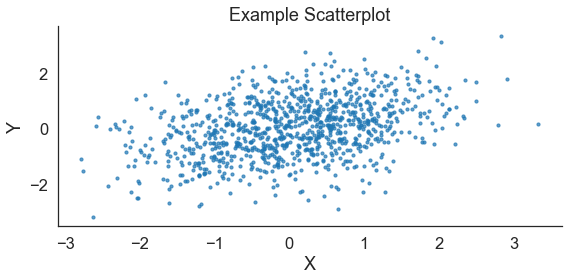

In [15]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(8,4))

## Simulate data.
mu = [0,0]
cov = [[1.0,0.4],[0.4,1.0]]
x, y = np.random.multivariate_normal(mu, cov, 1000).T

## Plot scatterplot.
ax.scatter(x, y, s=10, alpha=0.7)

## Add details.
ax.set(xlabel='X', ylabel='Y', title='Example Scatterplot')

sns.despine()
plt.tight_layout()

#### Histrograms
Histograms are very easy fortunately.

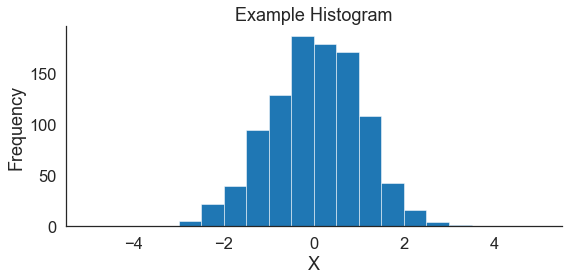

In [16]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(8,4))

## Plot scatterplot.
ax.hist(x, bins=np.linspace(-5,5,21), lw=0.5, edgecolor='w')

## Add details.
ax.set(xlabel='X', ylabel='Frequency', title='Example Histogram')

sns.despine()
plt.tight_layout()

#### Barplots
Barplots are probably the least intuitive plot in Matplotlib because the user must specify the starting point and width of the bars (this is in contrast to other languages that automatically assign x-coordinates to the bars). Though clunky, this does provide some additional control to the user. 

In this example, we will plot the average response within subjects.

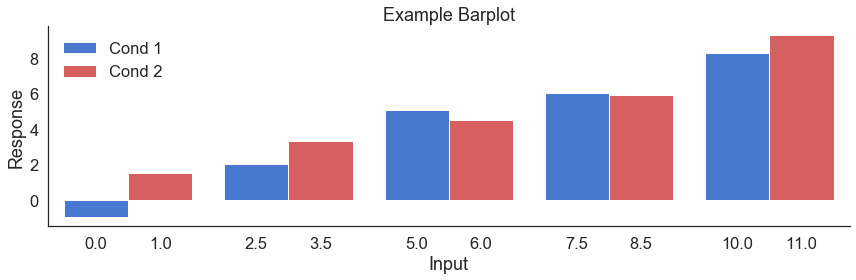

In [17]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Simulate data.
y = np.arange(10) + np.random.normal(0,0.5,10)
x = np.arange(10) + np.arange(10) // 2 * 0.5

## Plot bars.
ax.bar(x[::2], y[::2], width=1.0, color='#4878d0', label='Cond 1')
ax.bar(x[1::2], y[1::2], width=1.0, color='#d65f5f', label='Cond 2')

## Add details.
ax.set(xticks=x, xlim=(-0.75, 11.75), xlabel='Input', ylabel='Response', title='Example Barplot')
ax.legend(loc=2, frameon=False)

sns.despine()
plt.tight_layout();

### PAUSE: Visualization Exercises

Spend a few minutes visualizing the raw nerve data. 

1. Make a line plot of the raw nerve data with `times` on the x-axis and `nerve` on the y-axis. How would you plot the first 5s? The last 5s? How about between 6s and 7s? How would you change the labels and axis limits? How would you change the size of the figure canvas?

2. Make a histogram of the raw nerve data. Play with the `bins` argument. How does the data look depending on the `bins` you choose?

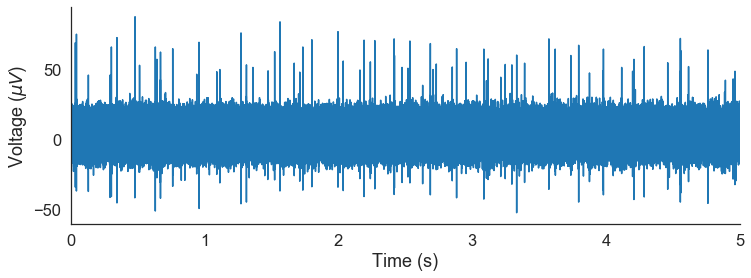

In [18]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Plot timeseries.
ax.plot(times, nerve)
ax.set(xlim=(0,5), xlabel='Time (s)', ylabel=r'Voltage ($\mu V$)')

sns.despine()

## Section 4: Filtering

Typically before analysis, we want to perform some preprocessing on our data. This might include masking noisy segments of data. Most often, we want to filter the data to remove slow-frequency drifts and high-frequency noise. [Gonzalo Rey et al. (2015)](https://www.sciencedirect.com/science/article/pii/S0361923015000684) recommend a high- and low-pass of 300 and 3000 Hz, respectively, for the extracellular nerve recording.

There are many ways to filter your data in python. Here we will use [mne-python](https://mne.tools/stable/index.html), a very helpful package for processing and analysis electrophysiology data. We will import the `filter_data` function. 

In [19]:
from mne.filter import filter_data

## Define filtering parameters.
l_freq = 300
h_freq = 3000
method = 'fir'
phase = 'zero'

## Reformat data.
nerve = nerve.reshape(1,-1).astype(np.float64)

## Filter data.
filt = filter_data(nerve, sfreq=sfreq, l_freq=l_freq, h_freq=h_freq, method=method, phase=phase).squeeze()

Setting up band-pass filter from 3e+02 - 3e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 300.00
- Lower transition bandwidth: 75.00 Hz (-6 dB cutoff frequency: 262.50 Hz)
- Upper passband edge: 3000.00 Hz
- Upper transition bandwidth: 750.00 Hz (-6 dB cutoff frequency: 3375.00 Hz)
- Filter length: 2201 samples (0.044 sec)



Now, let's compare the raw and filtered data using a lineplot. How has the data changed?

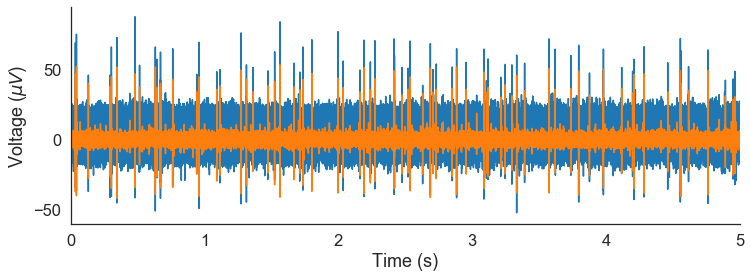

In [20]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Plot timeseries.
ax.plot(times, nerve.squeeze())
ax.plot(times, filt.squeeze())
ax.set(xlim=(0,5), xlabel='Time (s)', ylabel=r'Voltage ($\mu V$)')

sns.despine()

## Section 5: Spike Detection


In this last and final section, we will put together all of our skills from today and last week to perform a spike detection analysis. In the following series of exercises, you will 1) threshold and detect action potentials, 2) manually cluster the spikes, and 3) plot the average action potential waveform per cluster. 

#### Thresholding

The first step in spike detection is defining an amplitude threshold, or the recording value above which we think there has been an action potential. In a recent paper, [Rey et al. (2015)](https://www.sciencedirect.com/science/article/pii/S0361923015000684) suggest a simple data-driven technique for defining the amplitude threshold. Specifically, they define the thresold as multiple of an estimate of the standard deviation of the noise:

$$ \text{threshold} = k \cdot \hat{\sigma}_n $$

where $k$ is a constant typically between 3-5; and $\hat{\sigma}_n$ is an estimate of the standard deviation of the noise, defined as:

$$ \hat{\sigma}_n = \frac{\text{median} \left( |X| \right)}{0.6745} $$ 

where $|X|$ is the absolute value of the raw data.

We have written a function, `find_threshold`, that performs this calculation for you. We import it below. Read its docstring to learn more about how it works.

In [21]:
from utils import find_threshold
find_threshold?

Signature: find_threshold(X, k)
Docstring:
Calculate empirical amplitude threshold.

Parameters
----------
X : array_like, shape (n_times,)
    Raw data trace.
k : int
    Amplitude scalar.
    
Returns
-------
sigma : float
    Amplitude threshold
    
References
-----
[1] Rey, H. G., Pedreira, C., & Quiroga, R. Q. (2015). Past, present and future of 
    spike sorting techniques. Brain research bulletin, 119, 106-117.
File:      ~/Desktop/projects/neu350/session02/utils.py
Type:      function


Next, apply the function to the filtered nerve data using varying levels of `k`. Plot the first 1s of filtered nerve data using the line plot code above and the proposed amplitude threshold using `plt.axhline` or `ax.axhline`. (Google the function if you need help using it.)

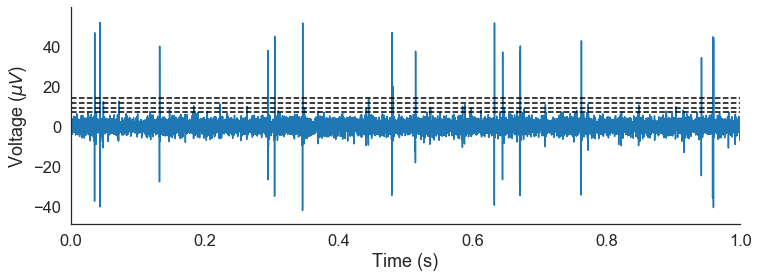

In [22]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Plot timeseries.
ax.plot(times, filt)

## Iteratively plot thresholds.
for k in [3,4,5,6]:
    ax.axhline(find_threshold(filt, k), color='k', linestyle='--')
    
## Add details.
ax.set(xlim=(0,1), xlabel='Time (s)', ylabel=r'Voltage ($\mu V$)')

sns.despine()

#### Spike Detection

Next we need a function that finds all segments of recording that exceed the threshold. We have provided a peak finding function for you. The function, `peak_finder`, accepts a raw data trace and a threshold. It then finds all clusters of samples above a threshold, and returns the index and signal magnitude corresponding to the peak of each cluster. The function relies on the `measurements` tools from scipy.ndimage. For a tutorial, see [here](https://dragly.org/2013/03/25/working-with-percolation-clusters-in-python/).

We import `peak_finder` below. Read its docstring to learn more about how it works.

In [23]:
from utils import peak_finder
peak_finder?

Signature: peak_finder(X, thresh)
Docstring:
Simple peak finding algorithm.

Parameters
----------
X : array_like, shape (n_times,)
    Raw data trace.
thresh : float
    Amplitude threshold.
    
Returns
-------
peak_loc : array_like, shape (n_clusters,)
    Index of peak amplitudes.
peak_mag : array_like, shape (n_clusters,)
    Magnitude of peak amplitudes.
File:      ~/Desktop/projects/neu350/session02/utils.py
Type:      function


To get an idea of how `peak_finder` works, apply the function to the filtered data. Use the corresponding threshold from `find_threshold` for $k=4$. 

This will return two outputs: `peak_loc`, or the _index_ of the peak of each spike, and `peak_mag`, or the amplitude of the peak of each spike. We can use these to overlay a scatterplot of detected spikes on top of a line plot of the filtered data. Plot the first second of the data. Using a scatterplot, indicate the peak for each detected spike.

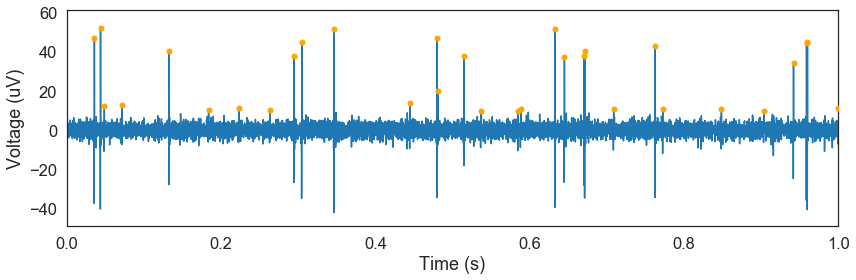

In [24]:
## Determine threshold.
threshold = find_threshold(filt, 4)

## Find peaks.
peak_loc, peak_mag = peak_finder(filt, threshold)

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Plot timeseries.
ax.plot(times, filt)

## Plot peak onsets.
ax.scatter(times[peak_loc], peak_mag, color='orange', s=25, zorder=10)

ax.set(xlim=(0, 1), xlabel='Time (s)', ylabel='Voltage (uV)')
plt.tight_layout()

f) Remake the plot above, but repeating the procedure with a constant $k=2$. How trustworthy is the spike detection algorithm with this more liberal threshold?

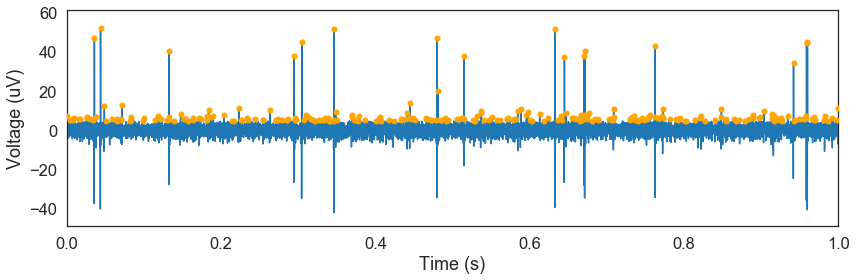

In [25]:
## Determine threshold.
threshold = find_threshold(filt, 2)

## Find peaks.
peak_loc, peak_mag = peak_finder(filt, threshold)

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Plot timeseries.
ax.plot(times, filt)

## Plot peak onsets.
ax.scatter(times[peak_loc], peak_mag, color='orange', s=25, zorder=10)

ax.set(xlim=(0,1), xlabel='Time (s)', ylabel='Voltage (uV)')
plt.tight_layout()

For this exercise, we will stick with a threshold of $k=4$. Re-apply the peak detection algorithm to the filtered data using the corresponding threshold when $k=4$. 

Plot a histogram of the peak magnitudes using `bins` between 0 and 60 in intervals of 1 (e.g. 0, 1, ..., 59, 60). How many clusters of spikes does there appear to be?

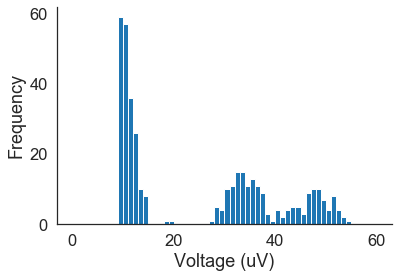

In [26]:
## Define threshold.
threshold = find_threshold(filt, k=4)

## Apply peak finding.
peak_loc, peak_mag = peak_finder(filt, threshold)

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(6,4))

## Define bins and plot.
ax.hist(peak_mag, bins=np.arange(0,61,1))
ax.set(xlabel='Voltage (uV)', ylabel='Frequency')

sns.despine()

Now we will manually assign each spike into one of three clusters. Define a new variable, `labels`, that stores the category label of each detected spike. Use `np.where` to assign category labels based on thresholds applied to `peak_mag`.

In [27]:
## Cluster spikes.
labels = np.where(peak_mag < 20, 0, np.where(peak_mag < 40, 1, 2))

#### Extracting and plotting spikes

Action potentials last roughly 1-2 milliseconds. With this in mind, extract a 3 ms window around each detected spike; that is, extract 1.5 ms of samples on either side of the detected peak. 

Hint: The data were recorded at 50 KHz meaning there are 50 samples per millisecond. 

In [28]:
## Extract spikes.
spikes = []
for ix in peak_loc:
    spikes.append( filt[ix-75:ix+75] )

## Convert to array.
spikes = np.array(spikes)

Plot each averaged spike waveform in a single plot. Add a legend denoting the spike cluster.

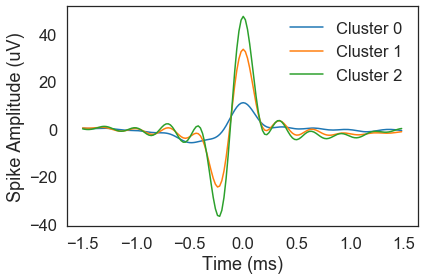

In [29]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(6,4))

## Plot average waveform.
for c in np.unique(labels):
    ax.plot(np.arange(-1.5,1.5,0.02), spikes[labels==c].mean(axis=0), label=f'Cluster {c}')

## Add details.
ax.set(xlabel='Time (ms)', ylabel='Spike Amplitude (uV)')
ax.legend(loc=1, frameon=False)
    
plt.tight_layout()